In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms

# step 2

df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 6/Lesson 3/london.csv', sep=',',parse_dates=['timestamp'])
df

timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1     2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2     2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3     2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4     2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...   ...  ...  ...    ...         ...           ...   
17409 2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410 2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411 2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412 2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413 2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0             0.0         1.0     3.0  
1             0.0         1.0     3.0  
2             0.0         1.0     3.0  
3             0.0         1.0     3.0  
4             0.0         1.0     3.0  
...           ...         ...     ...  
17409         0.0         0.0     3.0  
17410         0.0         0.0     3.0  
17411         0.0         0.0     3.0  
17412         0.0         0.0     3.0  
17413         0.0         0.0     3.0  

[17414 rows x 10 columns]

In [2]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [3]:

# step 3

# sns.lineplot(x=df.timestamp, y=df.cnt)




In [4]:
# step 4

df_step4 = df.copy()
df_step4 = df_step4.sort_values('timestamp')
df_step4 = df_step4.set_index('timestamp')
df_step4

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0  
...                         ...         ...     ...  
2017-01-03 19:00:00         0.0         0.0     3.0  
2017-01-03 20:00:00         0.0         0.0     3.0  
2017-01-03 21:00:00         0.0         0.0     3.0  
2017-01-03 22:00:00         0.0         0.0     3.0  
2017-01-03 23:00:00         0.0         0.0     3.0  

[17414 rows x 9 columns]

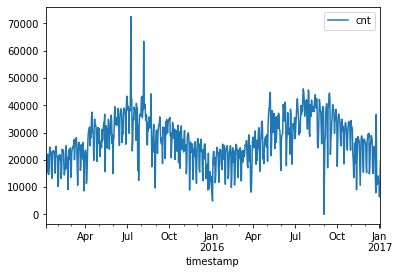

In [5]:
df_step4_final = df_step4.resample(rule='D').agg({'cnt':'sum'})

df_step4_final.plot()

In [6]:
# step 5

#df_step4_final

step5_final = df_step4_final.rolling(window=3).mean()

step5_final

cnt
timestamp               
2015-01-04           NaN
2015-01-05           NaN
2015-01-06  16739.666667
2015-01-07  20683.000000
2015-01-08  19092.666667
...                  ...
2016-12-30  12682.000000
2016-12-31  12347.333333
2017-01-01   9803.666667
2017-01-02   9889.333333
2017-01-03  12560.000000

[731 rows x 1 columns]

In [7]:
step5_final.loc[['2015-07-09']]

cnt
timestamp          
2015-07-09  50705.0

In [8]:
# step 6

step6_df = df_step4_final - step5_final

step6_df

cnt
timestamp              
2015-01-04          NaN
2015-01-05          NaN
2015-01-06  3873.333333
2015-01-07   381.000000
2015-01-08 -3491.666667
...                 ...
2016-12-30 -1116.000000
2016-12-31  -923.333333
2017-01-01 -3382.666667
2017-01-02  1933.666667
2017-01-03  6876.000000

[731 rows x 1 columns]

In [9]:
step6_std = round(np.std(step6_df), 2)

step6_std


cnt    4558.59
dtype: float64

In [24]:
# step 7

step7 = step5_final.reset_index().copy().fillna(0)

step7['upper_bound'] = step7.cnt + np.std(step6_df) * 2.576

step7['lower_bound'] = step7.cnt - np.std(step6_df) * 2.576

step7




timestamp           cnt  upper_bound  lower_bound
0   2015-01-04      0.000000          NaN          NaN
1   2015-01-05      0.000000          NaN          NaN
2   2015-01-06  16739.666667          NaN          NaN
3   2015-01-07  20683.000000          NaN          NaN
4   2015-01-08  19092.666667          NaN          NaN
..         ...           ...          ...          ...
726 2016-12-30  12682.000000          NaN          NaN
727 2016-12-31  12347.333333          NaN          NaN
728 2017-01-01   9803.666667          NaN          NaN
729 2017-01-02   9889.333333          NaN          NaN
730 2017-01-03  12560.000000          NaN          NaN

[731 rows x 4 columns]